# ¿De qué hablan sus discos?

El siguiente trabajo pretende hacer un estudio sobre la frecuencia de las palabras que utilizaron ambos artistas en cada una de sus composiciones discográficas a lo largo de su trayectoria utilizando NLP (Procesamiento de Lenguaje Natural).

Lejos está de una comparación competitiva o artística como ya varias veces se ha hecho, sino que el objetivo es poder descubrir ciertos patrones en la escritura de dos de los artistas más populares de la República Argentina en sus facetas como solistas.

![](https://www.latercera.com/resizer/BpUArqYGZiNmsrJwCOTzfOv65cY=/800x0/smart/arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/MYHXJXXWO5BKRNMOQE57TGHWSI.jpg)

### Algunas consideraciones a tener en cuenta

No hay que olvidar que el siguiente análisis fue realizado sobre letras de canciones, lo que significa que es muy común que encontremos varios monosílabos o palabras repetidas ya sea por reiteración en estribillos o algún otro recurso que se haya utilizado. 
Así que, en forma de spoiler, les anticipo que no esperen las palabras más "estéticas" o "rebuscadas" de sus artistas ya que, como mencionamos anteriormente, se trata de buscar los recursos más repetitivos que utilizaron en sus discografías.

Por otra parte, tampoco se realizará una descripción biográfica de cada artista ya que existe material en abundancia para conocer sus trayectorias, pero sí se aclaran ciertos puntos a tener en cuenta en la discografía analizada:

#### En el caso de Gustavo Cerati:

Sólo se tuvieron en cuenta los siguientes discos:
* Amor Amarillo (1993)
* Bocanada (1999)
* Siempre es Hoy (2002)
* Ahí Vamos (2006)
* Fuerza Natural (2009)

Cabe aclarar que en su faceta como solista, Gustavo también grabó un disco con Daniel Melero el cual se titula ***Colores Santos (1992)*** y también realizó la música para una película denominada ***+ bien (2001)***, entre algunos de sus trabajos.

#### En el caso del Indio Solari:

Se tuvieron en cuenta los siguientes discos:
* El tesoro de los inocentes (2004)
* Porco Rex (2007)
* El perfume de la tempestad (2010)
* Pajaritos, bravos muchachitos (2013)
* El ruiseñor, el amor y la muerte (2018)

Recientemente hizo el lanzamiento de dos sencillos titulados ***Encuentro con un ángel amateur (2021)*** y ***Rezando solo (2021)***, las cuales no se tuvieron en cuenta en el análisis.


## Análisis exploratorio

Para poder realizar el *text minning* de las discografías de ambos artistas, utilizaremos 10 archivos pickleados con terminación *.pckl* los cuales contienten todas las letras correspondiente a cada uno de sus discos.


In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import PlaintextCorpusReader
from wordcloud import WordCloud
pd.set_option('max_colwidth',150)

In [2]:
# Dirección de archivos
path_gustavo = '../Discografia/Gustavo Cerati/'
path_indio = '../Discografia/Indio Solari/'

#### Lista con el nombre de la discografía de ambos artistas

In [3]:
discografia_gustavo = ['Amor amarillo', 'Bocanada', 'Siempre es hoy', 'Ahi vamos', 'Fuerza natural']

discografia_indio = ['El tesoro de los inocentes', 'Porco Rex', 'El perfume de la tempestad',
                     'Pajaritos, bravos muchachitos', 'El ruiseñor, el amor y la muerte']

In [4]:
# Creamos dos diccionarios vacios para almacenar las letras de las canciones como valores y el nombre de los discos como key
data_gustavo = {}
data_indio = {}

for i, c in enumerate(discografia_gustavo):
    with open(path_gustavo + c + ".pckl", "rb") as file1:
        data_gustavo[c] = pickle.load(file1) 
        
for i, c in enumerate(discografia_indio):
    with open(path_indio + c + ".pckl", "rb") as file2:
        data_indio[c] = pickle.load(file2) 

In [5]:
# Revisamos que todo este guardado de manera correcta
print(data_gustavo.keys())
print(data_gustavo['Amor amarillo'][0:100])
print('\n')
print(data_indio.keys())
print(data_indio['El tesoro de los inocentes'][0:100])

dict_keys(['Amor amarillo', 'Bocanada', 'Siempre es hoy', 'Ahi vamos', 'Fuerza natural'])
Adentro tuyo Caigo del sol Adentro tuyo Es único Cuerpos de luz Corriendo en pleno cielo Cristales d


dict_keys(['El tesoro de los inocentes', 'Porco Rex', 'El perfume de la tempestad', 'Pajaritos, bravos muchachitos', 'El ruiseñor, el amor y la muerte'])
Vas corriendo con tus Nikes
    y las balas van detrás
    (lo que duele no es la goma
    sino su v


**Creamos diccionarios haciendo que las llaves (keys) sean los nombres de los discos y los valores (values) las letras de las canciones y luego los convertimos en dataframes.**

In [6]:
# Creamos un nuevo diccionario pasando los valores de las llaves a listas
gustavo_combinado = {key: [value] for (key,value) in data_gustavo.items()}
indio_combinado = {key: [value] for (key, value) in data_indio.items()}

# Ahora creamos los dataframes
df_gustavo = pd.DataFrame.from_dict(gustavo_combinado).transpose() # transponemos para que tenga las dimensiones correctas
df_gustavo.columns = ['Discografia']
df_indio = pd.DataFrame.from_dict(indio_combinado).transpose()
df_indio.columns = ['Discografia']

In [7]:
df_gustavo

,Discografia
Amor amarillo,Adentro tuyo Caigo del sol Adentro tuyo Es único Cuerpos de luz Corriendo en pleno cielo Cristales de amor amarillo No dejaré que seas fría Yo pod...
Bocanada,Cerca del nuevo fin Tabú fuego y dolor La selva se abrió a mis pies y por fin Tuve el valor de seguir Al ánimo de brillar La luz se adelantó ...
Siempre es hoy,Si un amor cayó del cielo No pregunto más En mis sueños nunca pierdo La oportunidad Aunque a veces se equivoquen No confundo más Voy a hacer que m...
Ahi vamos,"Estoy un poco harto de entrar en tus juegos de mente otra nube gris se aproxima y yo sé, que tanto le temes que al fin sucede Te es más fácil no c..."
Fuerza natural,Puedo equivocarme tengo todo por delante Y nunca me sentí tan bien Viajo sin moverme de aquí Chicos del espacio Están Jugando en mi Jardín Medirán...


In [8]:
df_indio

,Discografia
El tesoro de los inocentes,Vas corriendo con tus Nikes\n y las balas van detrás\n (lo que duele no es la goma\n sino su velocidad)\n\n En el cagadero\n no hay...
Porco Rex,\n No! no!... ciego en la bruma\n bellamente sangra su nariz\n van a tragarlo arenas movedizas\n (pagará caro lo tonto que fue)\n\n ...
El perfume de la tempestad,"\nVamos y no se empujen,\nNi pisoteen...\nque este temblor ya va a parar\nno tengan miedo\n\nTodos prontos a los botes\ny no se asusten\nque la ma..."
"Pajaritos, bravos muchachitos","\nDel cielo bajan ya,\nSe vienen a posar\nEn las ramas de mi árbol.\nQué potencia infernal\nMe obligan a enfrentar\nQué fiera jerarquía celeste\n\..."
"El ruiseñor, el amor y la muerte","\nCuando ya abandone mi nombre\nA merced de miserables, Ay!\nTal será mi vergüenza\nQue enviaré mi fantasma\nA librarme de ellos\n\nCon pinturas d..."


---

## Limpieza de datos

Como se puede observar las canciones de la discografía de Gustavo Cerati se ven más "limpios" que las del Indio Solari. Para ello procederemos a aplicar algunos filtros de limpieza que se suelen usar para poder tratar el texto:
* Pasar texto a minúsculas
* Quitar signos de puntuación (interrogación y otros símbolos)
* Quitar espacios extras, tabulaciones, etc

Para ello usaremos las librerías *re* y *string* importadas al principio del trabajo.

In [9]:
print(string.punctuation)
print(re.escape(string.punctuation))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


#### Defino una función que recibe un texto y devuelve el mismo texto sin signos

In [10]:
def texto_limpio_uno(texto):
    texto = texto.lower() # pasamos las mayusculas a minúsculas
    texto = re.sub('\[.*?¿\]\%', ' ', texto) # reemplaza el texto entre corchetes por espacio en blanco
    texto = re.sub('[%s]' % re.escape(string.punctuation), ' ', texto) # reemplaza signos de puntuación por espacio en blanco
    texto = re.sub('\w*\d\w*', '', texto) # remueve palabras que contienen numeros
    return texto

# Defino una función anónima que al pasarle un argumento devuelve el resultado de aplicarle la función anterios a este mismo argumento
ronda1 = lambda x: texto_limpio_uno(x)

# Creamos un nuevo dataframe para ambos artistas aplicandole la función
gustavo_clean = pd.DataFrame(df_gustavo.Discografia.apply(ronda1))
indio_clean = pd.DataFrame(df_indio.Discografia.apply(ronda1))

In [11]:
indio_clean.Discografia[0][:800]

'vas corriendo con tus nikes\n    y las balas van detrás\n     lo que duele no es la goma\n    sino su velocidad \n\n    en el cagadero\n    no hay gato más triste\n    sin moda de callejón\n\n    si nike es la cultura\n    nike es tu cultura  hoy\n\n    almacenes coloridos a los que llamás  ciudad \n    te envuelven con canciones\n    indoloras como hilo musical\n\n    que el pasado acabe\n    y a su fin que llegue\n    plantando la jeta  hoy\n\n    si nike es la cultura  hoy\n    nike es tu cultura  hoy\n\n    mientras michael se retira \n    en la cadena espn\n    hay papiamentos casteyankis\n    y caló pachuco irreal\n\n    jovencitos peligrosos\n    los papis no dan más  no bancan\n    carroñeros que te rajan\n    la careta de mtv latina\n\n    operarios con salarios de miseria\n    dirás    qué me importa eso \n    ten'

#### Hacemos una segunda vuelta de limpieza esta vez eliminando los salto de líneas, comillas y puntos suspensivos

In [12]:
def texto_limpio_dos(texto):
    texto = re.sub('[‘’“”…«»]', '', texto)
    texto = re.sub('\n', ' ', texto)
    return texto
 
ronda2 = lambda x: texto_limpio_dos(x)
 
gustavo_clean = pd.DataFrame(gustavo_clean.Discografia.apply(ronda2))
indio_clean = pd.DataFrame(indio_clean.Discografia.apply(ronda2))

In [13]:
indio_clean.Discografia[0][:800]

'vas corriendo con tus nikes     y las balas van detrás      lo que duele no es la goma     sino su velocidad       en el cagadero     no hay gato más triste     sin moda de callejón      si nike es la cultura     nike es tu cultura  hoy      almacenes coloridos a los que llamás  ciudad      te envuelven con canciones     indoloras como hilo musical      que el pasado acabe     y a su fin que llegue     plantando la jeta  hoy      si nike es la cultura  hoy     nike es tu cultura  hoy      mientras michael se retira      en la cadena espn     hay papiamentos casteyankis     y caló pachuco irreal      jovencitos peligrosos     los papis no dan más  no bancan     carroñeros que te rajan     la careta de mtv latina      operarios con salarios de miseria     dirás    qué me importa eso      ten'

#### Una vez filtrados los dataframes, creamos archivos pickles y los guardamos

In [14]:
df_gustavo.to_pickle('../Discografia/Gustavo Cerati/corpus_gustavo.pkl')
df_indio.to_pickle('../Discografia/Indio Solari/corpus_indio.pkl')

#### Ahora procederemos a utilizar el paquete nltk para descargar las "stopwords" en español y excluirlas de nuestro estudio

Las *stopwords* o *palabras vacías* son aquellas que no tienen un significado por sí solas, sino que modifican o acompañan a otras. Este grupo suele estar conformado por artículos, pronombres, preposiciones, adverbios e incluso algunos verbos.

In [15]:
nltk.download('stopwords')

lines = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aguya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
print(lines[:100])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo']


#### Utilizamos CountVectorizer para armar el modelo que va a entrenar a nuestros datos y excluir a las stopwords

In [17]:
# Ahora inicializamos el modelo de CountVectorizer excluyendo las StopWords
cv = CountVectorizer(stop_words=lines)

# Ajustamos el modelo y lo aplicamos a las letras de canciones de nuestros DataFrames generando una matriz esparsa
gustavo_cv = cv.fit_transform(gustavo_clean.Discografia)

# Creamos otro DataFrame para transformar la matriz que generamos recién a densa
gustavo_dtm = pd.DataFrame(gustavo_cv.toarray(), columns= cv.get_feature_names())

# Asignamos sus respectivos indíces
gustavo_dtm.index = gustavo_clean.index

In [18]:
# Realizamos lo mismo que el paso anterior para el Indio Solari
indio_cv = cv.fit_transform(indio_clean.Discografia)
indio_dtm = pd.DataFrame(indio_cv.toarray(), columns = cv.get_feature_names())
indio_dtm.index = indio_clean.index

In [19]:
indio_cv

<5x2607 sparse matrix of type '<class 'numpy.int64'>'
	with 3428 stored elements in Compressed Sparse Row format>

In [20]:
indio_dtm

,abajo,abandona,abandonado,abandone,abandoné,abandonó,abarcarlo,abre,abudante,aburra,...,árbol,ésta,éste,éxito,ópera,última,últimas,último,única,único
El tesoro de los inocentes,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
Porco Rex,1,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
El perfume de la tempestad,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"Pajaritos, bravos muchachitos",0,0,0,0,0,0,0,0,0,1,...,1,0,4,1,0,0,0,4,0,0
"El ruiseñor, el amor y la muerte",1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


#### Nuevamente procedemos a guardar nuestros datos en archivos pickle 

In [21]:
# Guardamos en formato pickle los dataframes
gustavo_dtm.to_pickle("../Discografia/Gustavo Cerati/gustavo_dtm.pkl")
gustavo_clean.to_pickle('../Discografia/Gustavo Cerati/gustavo_clean.pkl')
# Guardamos tambien el objeto CountVectorizer
pickle.dump(cv, open("../Discografia/Gustavo Cerati/gustavo_cv.pkl", "wb"))

In [22]:
# Guardamos en formato pickle los dataframes
indio_dtm.to_pickle("../Discografia/Indio Solari/indio_dtm.pkl")
indio_clean.to_pickle('../Discografia/Indio Solari/indio_clean.pkl')
# Guardamos tambien el objeto CountVectorize
pickle.dump(cv, open("../Discografia/Indio Solari/indio_cv.pkl", "wb"))

---

#### Observamos como se ven nuestros datos ahora

In [23]:
# Ahora volvemos a cargar los DataFrames generados anteriormente
data_gustavo = pd.read_pickle("../Discografia/Gustavo Cerati/gustavo_dtm.pkl")
data_indio = pd.read_pickle("../Discografia/Indio Solari/indio_dtm.pkl")

data_gustavo = data_gustavo.transpose()
data_indio = data_indio.transpose()

data_gustavo.head()

,Amor amarillo,Bocanada,Siempre es hoy,Ahi vamos,Fuerza natural
abajo,0,1,0,0,0
abandonar,0,0,1,0,0
abandonarme,1,0,0,0,0
abierta,0,0,0,1,0
abisal,1,0,0,0,0


In [24]:
data_indio.head()

,El tesoro de los inocentes,Porco Rex,El perfume de la tempestad,"Pajaritos, bravos muchachitos","El ruiseñor, el amor y la muerte"
abajo,0,1,0,0,1
abandona,0,0,0,0,1
abandonado,0,0,1,0,0
abandone,1,0,0,0,1
abandoné,1,0,0,0,0


### Palabras más frecuentes

En este paso nos interesa saber cuáles son las palabras que más se repiten en cada uno de los discos de los artistas.
Para ello vamos a armar un diccionario en donde la *key* va a ser el nombre del disco y los *values* van a contener una tupla con la palabra y la cantidad de veces que aparece. Luego imprimimos las primeras veinte palabras más repetidas por disco.

**En el caso de Gustavo Cerati:**

In [25]:
# Creo un diccionario vacío
top_gustavo = {}

# Por cada disco
for c in data_gustavo.columns:
    top = data_gustavo[c].sort_values(ascending=False).head(20) # Ordeno las filas en forma decreciente y me quedo con las 20 palabras mas usadas
    top_gustavo[c]= list(zip(top.index, top.values))       # le asigno el disco a la key del diccionario y como valor una tupla con la palabra y su frecuencia

print(top_gustavo)
print("\n")

# Imprimo las 20 palabras mas frecuentes por disco
print('Las palabras más repetidas por disco:')
for disco, top_words in top_gustavo.items():
    print(disco) # imprimo la key
    print(', '.join([word for word, count in top_words[0:20]])) # imprimo las palabras en orden decreciente segun frecuencia y separadas con espacio y coma

{'Amor amarillo': [('ey', 12), ('merced', 8), ('sé', 6), ('si', 6), ('amor', 5), ('tiempo', 5), ('justo', 5), ('vuelvo', 4), ('nunca', 4), ('vida', 4), ('ahora', 4), ('adentro', 4), ('vuela', 4), ('único', 4), ('sol', 4), ('hoy', 4), ('descanso', 3), ('cielo', 3), ('salvaje', 3), ('mirada', 3)], 'Bocanada': [('amor', 8), ('olvidar', 8), ('fluir', 8), ('mas', 8), ('fin', 7), ('aqui', 7), ('facil', 7), ('beautiful', 6), ('ahora', 5), ('tan', 5), ('si', 4), ('puente', 4), ('moviendolo', 4), ('decirnos', 4), ('estrella', 4), ('lentamente', 4), ('cruza', 4), ('sacarlo', 4), ('sigo', 4), ('babel', 4)], 'Siempre es hoy': [('ah', 20), ('si', 12), ('hoy', 11), ('cicatriz', 9), ('quiero', 8), ('siempre', 8), ('mas', 8), ('cosas', 8), ('parte', 8), ('amo', 7), ('hace', 7), ('ser', 7), ('solo', 6), ('imposibles', 6), ('asi', 6), ('hacer', 6), ('nadie', 6), ('tiempo', 5), ('vivo', 5), ('nunca', 5)], 'Ahi vamos': [('fin', 15), ('si', 13), ('sé', 10), ('hoy', 8), ('amor', 8), ('sucede', 8), ('voy', 8

**En el caso del Indio Solari:**

In [26]:
# Creo un diccionario vacío
top_indio = {}

# Por cada disco
for c in data_indio.columns:
    top = data_indio[c].sort_values(ascending=False).head(20) # Ordeno las filas en forma decreciente y me quedo con las 20 palabras mas usadas
    top_indio[c]= list(zip(top.index, top.values))       # le asigno el disco a la key del diccionario y como valor una tupla con la palabra y su frecuencia

print(top_indio)
print("\n")

# Imprimo las 20 palabras mas frecuentes por disco
print('Las palabras más repetidas por disco:')
for disco, top_words in top_indio.items():
    print(disco) # imprimo la key
    print(', '.join([word for word, count in top_words[0:20]])) # imprimo las palabras en orden decreciente segun frecuencia y separadas con espacio y coma

{'El tesoro de los inocentes': [('amor', 25), ('va', 22), ('así', 22), ('allí', 19), ('check', 17), ('nunca', 14), ('si', 12), ('out', 12), ('hoy', 11), ('in', 11), ('tarde', 11), ('siempre', 10), ('ooh', 10), ('vos', 9), ('nomás', 8), ('vida', 8), ('bye', 8), ('cielo', 8), ('van', 8), ('vez', 8)], 'Porco Rex': [('vos', 21), ('encantador', 15), ('sueño', 12), ('si', 10), ('sos', 10), ('tan', 10), ('voy', 10), ('amor', 8), ('sueños', 7), ('vez', 7), ('hoy', 6), ('oh', 6), ('tiempo', 6), ('vas', 6), ('nunca', 6), ('va', 6), ('ves', 6), ('sé', 6), ('así', 5), ('siempre', 5)], 'El perfume de la tempestad': [('luz', 11), ('hoy', 10), ('aleluya', 10), ('siempre', 10), ('sos', 10), ('mas', 10), ('si', 9), ('cruz', 8), ('va', 7), ('hace', 7), ('amor', 7), ('vas', 6), ('van', 6), ('dulce', 6), ('nube', 6), ('tormenta', 5), ('vos', 5), ('pasa', 5), ('ven', 5), ('vida', 5)], 'Pajaritos, bravos muchachitos': [('vos', 11), ('siempre', 11), ('amor', 11), ('amok', 8), ('si', 8), ('va', 7), ('vas', 7)

### Agregado de palabras al stopwords

Observando las palabras más repetidas de cada disco, haremos un filtrado un poco más extenso del que trae la librería de StopWords, entendiendo que no es lo más correcto, pero con el objetivo de visualizar palabras mas "ricas" que ciertos monosílabos los cuales son muy comunes en las canciones debido a su formato de escritura o palabras que suelen ser muy repetitivas en determinadas canciones.

In [27]:
# Agregamos algunas palabras mas a la lista de stopwords
more_stop_words=['ey', 'ah', 'uhh', 'si', 'ooh', 'oh', 'ay', 'va', 'así', 'in', 'out','check','vos','bang', 'merced',
                'van', 'tan', 'voy', 'vez', 'vas', 'tan', 'ven', 'babas', 'sé', 'se', 'asi', 'ves', 'sos', 'amok', 'mai']
for pal in more_stop_words:
    lines.append(pal)

#### Recreamos la matriz de documentos y términos pero usando la nueva lista "mejorada" de stopwords y guardamos

In [28]:
# Gustavo Cerati
cv = CountVectorizer(stop_words=lines)
gustavo_cv = cv.fit_transform(gustavo_clean.Discografia)
gustavo_stop = pd.DataFrame(gustavo_cv.toarray(), columns=cv.get_feature_names())
gustavo_stop.index = gustavo_clean.index
 
# Lo guardamos en formato pickle
pickle.dump(cv, open("../Discografia/Gustavo Cerati/gustavo_cv_stop.pkl", "wb"))
gustavo_stop.to_pickle("../Discografia/Gustavo Cerati/gustavo_dtm_stop.pkl")

In [29]:
# Indio Solari
cv = CountVectorizer(stop_words=lines)
indio_cv = cv.fit_transform(indio_clean.Discografia)
indio_stop = pd.DataFrame(indio_cv.toarray(), columns=cv.get_feature_names())
indio_stop.index = indio_clean.index
 
# Lo guardamos en formato pickle
pickle.dump(cv, open("../Discografia/Indio Solari/indio_cv_stop.pkl", "wb"))
indio_stop.to_pickle("../Discografia/Indio Solari/indio_dtm_stop.pkl")

### Wordcloud o Nube de palabras

La nube de palabras es una representación visual de las palabras que conforman un texto, en donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

En este caso haremos una representación por disco de cada artista para observar cuáles fueron las palabras más utilizadas en cada uno de ellos.

Recordar que el último agregado de palabras que se hizo al stopword fue para poder visualizar aquellas que tengan un mayor sentido para analizar.

### Gustavo cerati

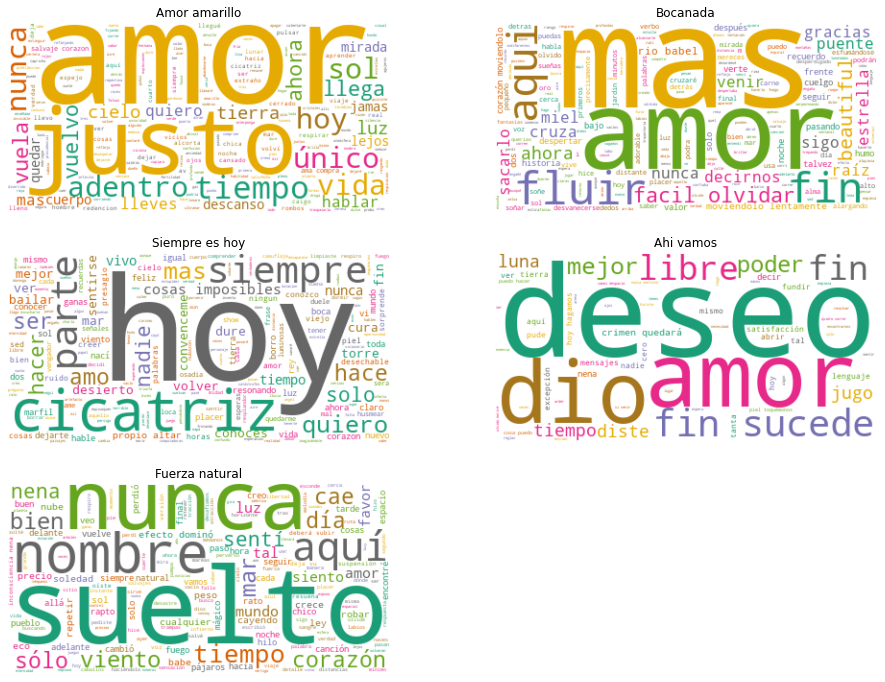

In [30]:
# Creo el objeto WordCloud con determinados parametros y utilizando nuestra lista de stopwords
wc = WordCloud(stopwords=lines, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
 
plt.rcParams['figure.figsize'] = [16,12] # tamaño de los plots

# Para cada disco creo un WC
for index, disco in enumerate(data_gustavo.columns):
    wc.generate(gustavo_clean.Discografia[disco])  # aca le pido que genere los WC a partir del texto de cada disco
    plt.subplot(3, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")  
    plt.axis("off")
    plt.title(discografia_gustavo[index])
plt.show()

### Indio Solari

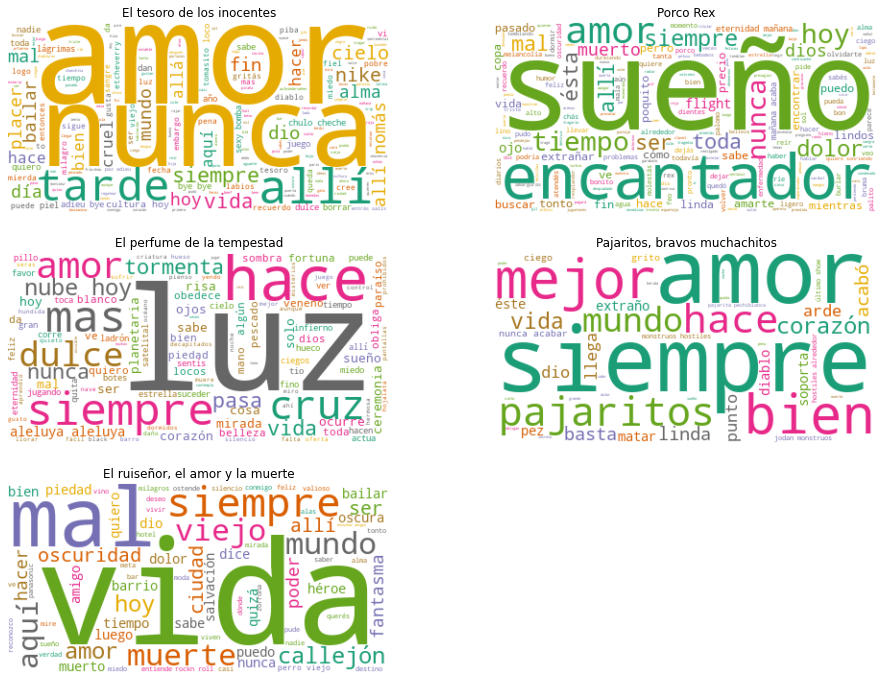

In [31]:
# Creo el objeto WordCloud con determinados parametros y utilizando nuestra lista de stopwords
wc = WordCloud(stopwords=lines, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
 
plt.rcParams['figure.figsize'] = [16,12] # tamaño de los plots

# Para cada disco creo un WC
for index, disco in enumerate(data_indio.columns):
    wc.generate(indio_clean.Discografia[disco])  # aca le pido que genere los WC a partir del texto de cada disco
    plt.subplot(3, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")  
    plt.axis("off")
    plt.title(discografia_indio[index])
plt.show()

---

## Estadísticas de palabras por disco

Buscaremos el número de palabras únicas y totales por disco de cada artista.

#### Palabras únicas

In [32]:
# Encontraremos las palabras unicas por disco identificando los elementos non-zero en la matriz de documentos y terminos
unique_gustavo = []
for disco in data_gustavo.columns:
    uniques_g = data_gustavo[disco].to_numpy().nonzero()[0].size # tengo que transformar a un array para aplicar la funcion nonzero
    unique_gustavo.append(uniques_g)
 
# Creo un nuevo dataframe con el numero de palabras unicas por disco
gustavo_words = pd.DataFrame(list(zip(discografia_gustavo, unique_gustavo)), columns=['Discos', 'Palabras únicas'])
gustavo_words

,Discos,Palabras únicas
0,Amor amarillo,238
1,Bocanada,373
2,Siempre es hoy,463
3,Ahi vamos,425
4,Fuerza natural,580


In [33]:
unique_indio = []
for disco in data_indio.columns:
    uniques_i = data_indio[disco].to_numpy().nonzero()[0].size # tengo que transformar a un array para aplicar la funcion nonzero
    unique_indio.append(uniques_i)
 
# Creo un nuevo dataframe con el numero de palabras unicas por disco
indio_words = pd.DataFrame(list(zip(discografia_indio, unique_indio)), columns=['Discos', 'Palabras únicas'])
indio_words

,Discos,Palabras únicas
0,El tesoro de los inocentes,930
1,Porco Rex,585
2,El perfume de la tempestad,608
3,"Pajaritos, bravos muchachitos",603
4,"El ruiseñor, el amor y la muerte",702


#### Palabras totales

In [34]:
# Encuentro el numero total de palabras por disco
list_gustavo = []
for disco in data_gustavo.columns:
    total_gustavo = sum(data_gustavo[disco])
    list_gustavo.append(total_gustavo)
    
list_indio = []
for disco in data_indio.columns:
    total_indio = sum(data_indio[disco])
    list_indio.append(total_indio)

In [35]:
gustavo_words['Palabras totales'] = list_gustavo

gustavo_words

,Discos,Palabras únicas,Palabras totales
0,Amor amarillo,238,378
1,Bocanada,373,561
2,Siempre es hoy,463,754
3,Ahi vamos,425,772
4,Fuerza natural,580,925


In [36]:
indio_words['Palabras totales'] = list_indio

indio_words

,Discos,Palabras únicas,Palabras totales
0,El tesoro de los inocentes,930,1474
1,Porco Rex,585,869
2,El perfume de la tempestad,608,889
3,"Pajaritos, bravos muchachitos",603,917
4,"El ruiseñor, el amor y la muerte",702,1124


# Gráfica de palabras

A continuación se grafica en un diagrama de barras la cantidad de palabras únicas y totales de cada artista discriminadas por los diferentes discos.

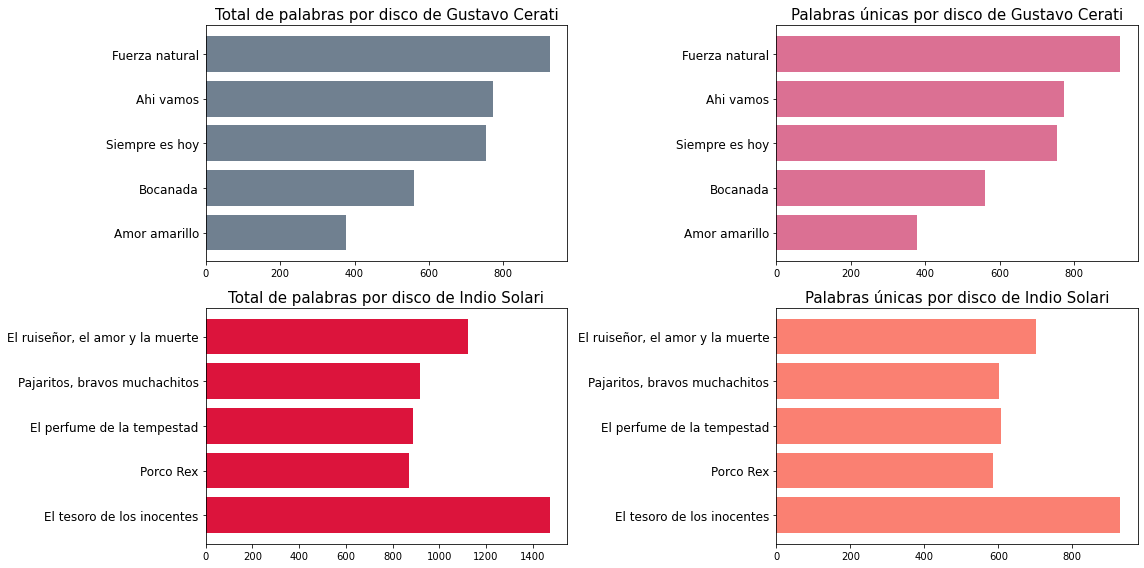

In [37]:
plt.rcParams['figure.figsize'] = [16, 8]
 
gustavo_pos = np.arange(len(gustavo_words))
indio_pos = np.arange(len(indio_words))

plt.subplot(2, 2, 1)
plt.barh(gustavo_pos, gustavo_words['Palabras totales'], align='center', color='slategrey')
plt.yticks(gustavo_pos, gustavo_words.Discos, fontsize=12)
plt.title('Total de palabras por disco de Gustavo Cerati', fontsize=15)

plt.subplot(2, 2, 2)
plt.barh(gustavo_pos, gustavo_words['Palabras totales'], align='center', color='palevioletred')
plt.yticks(gustavo_pos, gustavo_words.Discos, fontsize=12)
plt.title('Palabras únicas por disco de Gustavo Cerati', fontsize=15)

plt.subplot(2, 2, 3)
plt.barh(indio_pos, indio_words['Palabras totales'], align='center', color='crimson')
plt.yticks(indio_pos, indio_words.Discos, fontsize=12)
plt.title('Total de palabras por disco de Indio Solari', fontsize=15)

plt.subplot(2, 2, 4)
plt.barh(indio_pos, indio_words['Palabras únicas'], align='center', color='salmon')
plt.yticks(indio_pos, indio_words.Discos, fontsize=12)
plt.title('Palabras únicas por disco de Indio Solari', fontsize=15)

plt.tight_layout()
plt.show()

### Palabras en números

In [38]:
total_indio = indio_words['Palabras totales'].sum()
total_gustavo = gustavo_words['Palabras totales'].sum()
total_palabras = total_indio + total_gustavo

print('El total de palabras del Indio Solari en su discografía fue de {} palabras.'.format(total_indio))
print('El total de palabras de Gustavo en su discografía fue de {} palabras.'.format(total_gustavo))
print('El total de palabras de ambos artistas es de {} palabras.'.format(total_palabras))
print('Del total de palabras de ambos artistas corresponden al Indio el {} %'.format(round((total_indio/total_palabras)*100),2))
print('Del total de palabras de ambos artistas corresponden a Gustavo el {} %'.format(round((total_gustavo/total_palabras)*100),2))

El total de palabras del Indio Solari en su discografía fue de 5273 palabras.
El total de palabras de Gustavo en su discografía fue de 3390 palabras.
El total de palabras de ambos artistas es de 8663 palabras.
Del total de palabras de ambos artistas corresponden al Indio el 61 %
Del total de palabras de ambos artistas corresponden a Gustavo el 39 %


### Tambien podemos hacer una comparativa de frecuencia de uso de algunas palabras

En este caso elegimos *amor*, *siempre*, *mas* y *hoy* para ambos artistas.

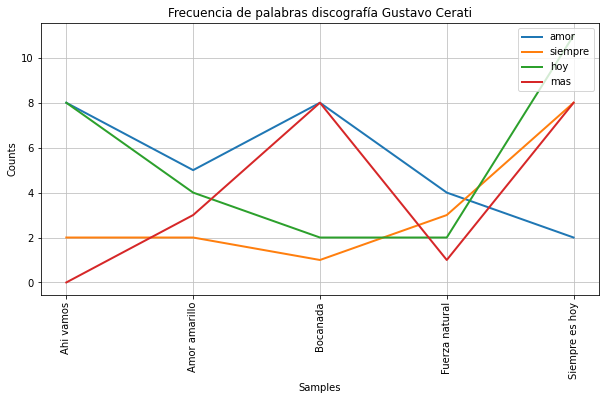

<AxesSubplot:title={'center':'Frecuencia de palabras discografía Gustavo Cerati'}, xlabel='Samples', ylabel='Counts'>

In [39]:
corpus_root = path_gustavo
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')
#wordlists.fileids() # con esto listamos los archivos del directorio

plt.figure(figsize=(10,5))
cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in discografia_gustavo
        for w in wordlists.words(genre + '.pckl')
        for word in ['amor','siempre','mas','hoy']
        if w.lower().startswith(word) )
plt.title('Frecuencia de palabras discografía Gustavo Cerati')
cfd.plot()

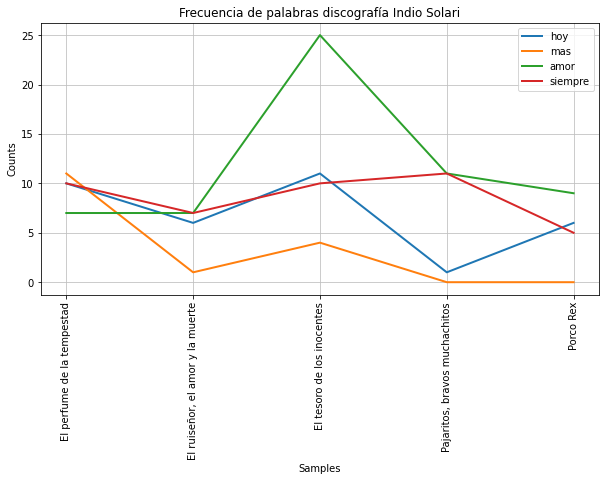

<AxesSubplot:title={'center':'Frecuencia de palabras discografía Indio Solari'}, xlabel='Samples', ylabel='Counts'>

In [40]:
corpus_root = path_indio
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')

plt.figure(figsize=(10,5))
cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in discografia_indio
        for w in wordlists.words(genre + '.pckl')
        for word in ['amor','siempre','mas','hoy']
        if w.lower().startswith(word) )
plt.title('Frecuencia de palabras discografía Indio Solari')
cfd.plot()

----

# Análisis de sentimientos

El análisis de sentimientos consiste en el proceso de determinar la actitud o la emoción del escritor, es decir, si es positiva, negativa o neutral.

Para ello utilizaremos la librería *TextBlob* que ya viene con dicha funcionalidad. En este caso debemos traducir las letras de las canciones a inglés debido a que es de la única forma que funciona.

La función de sentimiento de textblob devuelve dos propiedades, polaridad y subjetividad:
* **Polaridad:** se encuentra en el rango de [-1,1] donde 1 significa afirmación positiva y -1 significa afirmación negativa.
* **Subjetividad:** Las oraciones subjetivas generalmente se refieren a opiniones, emociones o juicios personales, mientras que las objetivas se refieren a información fáctica. Se encuentra en el rango de [0,1].


In [41]:
data_gustavo = pd.read_pickle('../Discografia/Gustavo Cerati/corpus_gustavo.pkl')
data_indio = pd.read_pickle('../Discografia/Indio Solari/corpus_indio.pkl')

In [42]:
data_gustavo['Nombre disco'] = ['Amor amarillo', 'Bocanada', 'Siempre es hoy', 'Ahi vamos', 'Fuerza natural']

In [43]:
data_indio['Nombre disco'] = ['El tesoro de los inocentes', 'Porco Rex', 'El perfume de la tempestad',
                     'Pajaritos, bravos muchachitos', 'El ruiseñor, el amor y la muerte']

#### Aplicamos TextBlob y traducimos al inglés

In [44]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

# Realmente lo traducimos al inglés pues el analisis de sentimiento de TextBlob no funciona en Español :(
traducir = lambda x: TextBlob(x).translate(to="en")

data_gustavo['blob_en'] = data_gustavo['Discografia'].apply(traducir)
data_gustavo['polarity'] = data_gustavo['blob_en'].apply(pol2)
data_gustavo['subjectivity'] = data_gustavo['blob_en'].apply(sub2)
data_gustavo

,Discografia,Nombre disco,blob_en,polarity,subjectivity
Amor amarillo,Adentro tuyo Caigo del sol Adentro tuyo Es único Cuerpos de luz Corriendo en pleno cielo Cristales de amor amarillo No dejaré que seas fría Yo pod...,Amor amarillo,"(I, n, s, i, d, e, , o, f, , y, o, u, , I, , f, a, l, l, , f, r, o, m, , t, h, e, , s, u, n, , I, n, s, i, d, e, , o, f, , y, o, u, , I...",0.112831,0.518871
Bocanada,Cerca del nuevo fin Tabú fuego y dolor La selva se abrió a mis pies y por fin Tuve el valor de seguir Al ánimo de brillar La luz se adelantó ...,Bocanada,"(N, e, a, r, , t, h, e, , n, e, w, , e, n, d, , T, a, b, o, o, , f, i, r, e, , a, n, d, , p, a, i, n, , T, h, e, , j, u, n, g, l, e, , o...",0.226318,0.539870
Siempre es hoy,Si un amor cayó del cielo No pregunto más En mis sueños nunca pierdo La oportunidad Aunque a veces se equivoquen No confundo más Voy a hacer que m...,Siempre es hoy,"(I, f, , a, , l, o, v, e, , f, e, l, l, , f, r, o, m, , t, h, e, , s, k, y, , I, , d, o, , n, o, t, , a, s, k, , m, o, r, e, , I, n, ...",0.118362,0.542056
Ahi vamos,"Estoy un poco harto de entrar en tus juegos de mente otra nube gris se aproxima y yo sé, que tanto le temes que al fin sucede Te es más fácil no c...",Ahi vamos,"(I, ', m, , a, , l, i, t, t, l, e, , t, i, r, e, d, , o, f, , e, n, t, e, r, i, n, g, , y, o, u, r, , m, i, n, d, , g, a, m, e, s, , a, n...",0.183513,0.507842
Fuerza natural,Puedo equivocarme tengo todo por delante Y nunca me sentí tan bien Viajo sin moverme de aquí Chicos del espacio Están Jugando en mi Jardín Medirán...,Fuerza natural,"(I, , c, a, n, , b, e, , w, r, o, n, g, , I, , h, a, v, e, , e, v, e, r, y, t, h, i, n, g, , a, h, e, a, d, , A, n, d, , I, , n, e, v, e...",0.135873,0.467676


In [45]:
data_indio['blob_en'] = data_indio['Discografia'].apply(traducir)
data_indio['polarity'] = data_indio['blob_en'].apply(pol2)
data_indio['subjectivity'] = data_indio['blob_en'].apply(sub2)
data_indio

,Discografia,Nombre disco,blob_en,polarity,subjectivity
El tesoro de los inocentes,Vas corriendo con tus Nikes\n y las balas van detrás\n (lo que duele no es la goma\n sino su velocidad)\n\n En el cagadero\n no hay...,El tesoro de los inocentes,"(Y, o, u, , g, o, , r, u, n, n, i, n, g, , w, i, t, h, , y, o, u, r, , N, i, k, e, s, \n, , , , , a, n, d, , t, h, e, , b, u, l, l, e, ...",0.015657,0.539736
Porco Rex,\n No! no!... ciego en la bruma\n bellamente sangra su nariz\n van a tragarlo arenas movedizas\n (pagará caro lo tonto que fue)\n\n ...,Porco Rex,"(N, o, !, , n, o, !, , ., ., ., , b, l, i, n, d, , i, n, , t, h, e, , h, a, z, e, \n, , , , , h, e, r, , n, o, s, e, , b, l, e, e, d, ...",0.088465,0.608447
El perfume de la tempestad,"\nVamos y no se empujen,\nNi pisoteen...\nque este temblor ya va a parar\nno tengan miedo\n\nTodos prontos a los botes\ny no se asusten\nque la ma...",El perfume de la tempestad,"(C, o, m, e, , o, n, , a, n, d, , d, o, n, ', t, , p, u, s, h, , y, o, u, r, s, e, l, f, \n, D, o, , n, o, t, , t, r, a, m, p, l, e, , ., ...",0.084086,0.534012
"Pajaritos, bravos muchachitos","\nDel cielo bajan ya,\nSe vienen a posar\nEn las ramas de mi árbol.\nQué potencia infernal\nMe obligan a enfrentar\nQué fiera jerarquía celeste\n\...","Pajaritos, bravos muchachitos","(T, h, e, y, , c, o, m, e, , d, o, w, n, , f, r, o, m, , t, h, e, , s, k, y, \n, T, h, e, y, , c, o, m, e, , t, o, , p, o, s, e, \n, I, n,...",0.138125,0.534586
"El ruiseñor, el amor y la muerte","\nCuando ya abandone mi nombre\nA merced de miserables, Ay!\nTal será mi vergüenza\nQue enviaré mi fantasma\nA librarme de ellos\n\nCon pinturas d...","El ruiseñor, el amor y la muerte","(W, h, e, n, , I, , l, e, a, v, e, , m, y, , n, a, m, e, \n, A, t, , t, h, e, , m, e, r, c, y, , o, f, , t, h, e, , w, r, e, t, c, h, e, ...",0.082238,0.537910


#### Graficamos el análisis de sentimientos

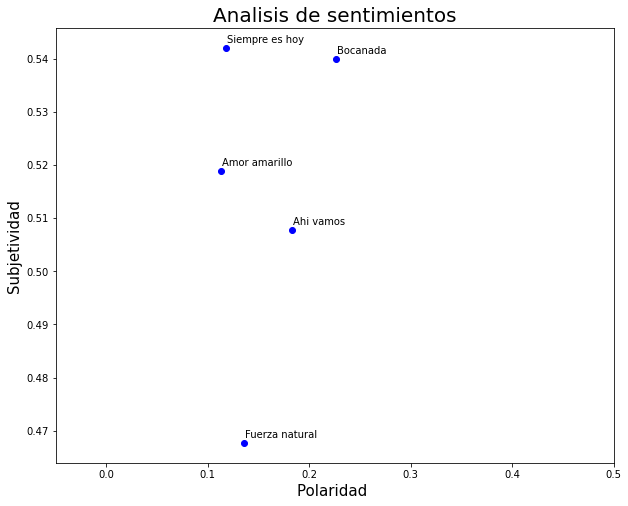

In [46]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, disco in enumerate(data_gustavo.index):
    x = data_gustavo.polarity.loc[disco]
    y = data_gustavo.subjectivity.loc[disco]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_gustavo['Nombre disco'][index], fontsize=10)
    plt.xlim(-0.05, 0.5) 
    
plt.title('Analisis de sentimientos', fontsize=20)
plt.xlabel('Polaridad ', fontsize=15)
plt.ylabel('Subjetividad', fontsize=15)

plt.show()

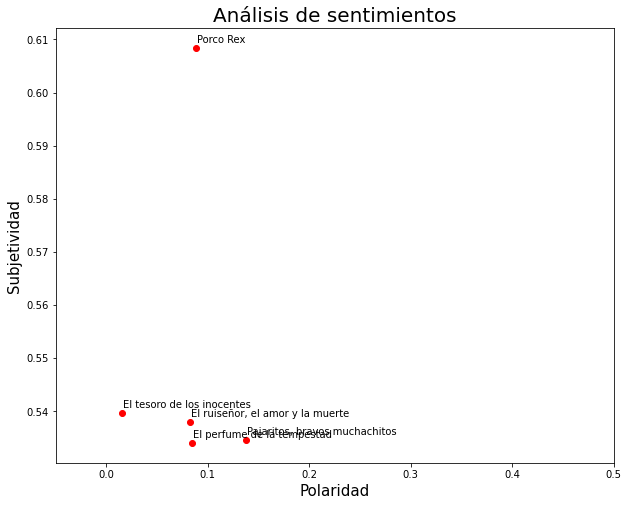

In [47]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, disco in enumerate(data_indio.index):
    x = data_indio.polarity.loc[disco]
    y = data_indio.subjectivity.loc[disco]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data_indio['Nombre disco'][index], fontsize=10)
    plt.xlim(-0.05, 0.5) 
    
plt.title('Análisis de sentimientos', fontsize=20)
plt.xlabel('Polaridad', fontsize=15)
plt.ylabel('Subjetividad', fontsize=15)

plt.show()

# Conclusiones

Como conclusiones del siguiente trabajo podemos estimar que:
* Ambos artistas a lo largo de su discografía tienen mucho contenido sobre la temática relacionada con el amor, o por lo menos es una palabra que se encuentra presente casi siempre.
* Se puede decir que el Indio Solari utiliza mayor cantidad de palabras en sus canciones que Gustavo Cerati ya que puede observarse que del total de palabras que suman las discografías de ambos artistas, el Indio ocupó 22% más de lírica que Gustavo.
* Haciendo un análisis de sensibilidad simple, pareciera ser que las letras de Gustavo Cerati tienen en su mayoría más subjetividad que las del Indio, esto quiere decir que probablemente sus canciones tengan un contenido más emotivo o personal a comparación de las del Indio que parecieran tener un contenido más fáctico.
* También podría deducirse que el contenido de las canciones de Gustavo Cerati presentan una polaridad mayor que las del Indio, lo que quiere decir que probablemente tengan un contenido un poco más positivo.

Cabe aclarar que dicho trabajo tiene una connotación enteramente didáctica y práctica y que las conclusiones son basadas en un estudio extremadamente simplificado.

Considero que la música debe ser completamente subjetiva y que cada persona debe darle el significado a las canciones de la manera que más lo disfruten.

Para la realización de este trabajo me guié y aprendí de https://www.aprendemachinelearning.com/